# Loading Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Loading Data

In [7]:
data = pd.read_csv("C:/Users/Nilima/Desktop/Regression/terrorism.csv")
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

## Lets Check Data more deep

In [5]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### We can clearly saw that the mean of the countries with crime rate is approximately 132 and total is  181691

### Now check all null values or insufficient data columns

In [8]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

### Ok there is so many null values but some columns are hidden, so lets unhide them

In [10]:
nan_values = data.isna()
nan_columns = nan_values.any()

columns_with_nan = data.columns[nan_columns].tolist()
columns_with_nan

['approxdate',
 'resolution',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'location',
 'summary',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',


### Lets explore and process on the columns

In [11]:
data.rename(columns = {'iyear' : 'Year', 'imonth': 'Month', 'iday' : 'Day', 'country_txt' : 'Country', 'region_txt' : 'Region', 'provstate': 'Provstate','city' : 'City', 
                     'attacktype1_txt' : 'Attacktype', 'target1' : 'Target','nkill' : 'NKill','nwound' : 'Nwound', 'summary' : 'Summary','weaptype1_txt' : 'Weaptype',
                     'motive' : 'Motive','crit1' : 'Crit1', 'crit2': 'Crit2', 'crit3' : 'Crit3' , 'success' : 'Success' , 'suicide' : 'Suicide' , 'targetype1_txt' : 'Targetype' ,
                     'natlty1_txt' : 'Natlty1' , 'natlty2_txt' : 'Natlty2' , 'natlty3_txt' : 'Natlty3', 'gname' : 'Gname' , 'guncertain' : 'Guncertain' , 'claimed' : 'Claimed' } , inplace = True)

In [12]:
pd.set_option("display.max_columns" , None)
print(data.dtypes)

eventid        int64
Year           int64
Month          int64
Day            int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object


In [42]:
data = data[['Year' , 'Month' ,  'Country' , 'Region' , 'Provstate' , 'City' , 'Crit1' , 'Crit2' , 'Crit3' , 'Success' , 'Suicide' , 'Attacktype' , 'Natlty1' , 'Gname'
, 'Claimed' , 'Weaptype' , 'NKill' , 'Nwound' , 'Motive']]

KeyError: "['Motive', 'Natlty1', 'Claimed'] not in index"

In [17]:
data.head()

,Year,Month,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Natlty1,Gname,Claimed,Weaptype,NKill,Nwound,Motive
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,0,Assassination,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,United States,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,United States,Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,United States,Unknown,NaN,Incendiary,NaN,NaN,NaN


In [18]:
data.count()

Year          181691
Month         181691
Country       181691
Region        181691
Provstate     181270
City          181257
Crit1         181691
Crit2         181691
Crit3         181691
Success       181691
Suicide       181691
Attacktype    181691
Natlty1       180132
Gname         181691
Claimed       115571
Weaptype      181691
NKill         171378
Nwound        165380
Motive         50561
dtype: int64

In [19]:
data.isnull().sum()

Year               0
Month              0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
Natlty1         1559
Gname              0
Claimed        66120
Weaptype           0
NKill          10313
Nwound         16311
Motive        131130
dtype: int64

In [20]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage

Year           0.000000
Month          0.000000
Country        0.000000
Region         0.000000
Provstate      0.231712
City           0.238867
Crit1          0.000000
Crit2          0.000000
Crit3          0.000000
Success        0.000000
Suicide        0.000000
Attacktype     0.000000
Natlty1        0.858050
Gname          0.000000
Claimed       36.391456
Weaptype       0.000000
NKill          5.676120
Nwound         8.977330
Motive        72.171984
dtype: float64

<AxesSubplot:>

<Figure size 432x360 with 0 Axes>

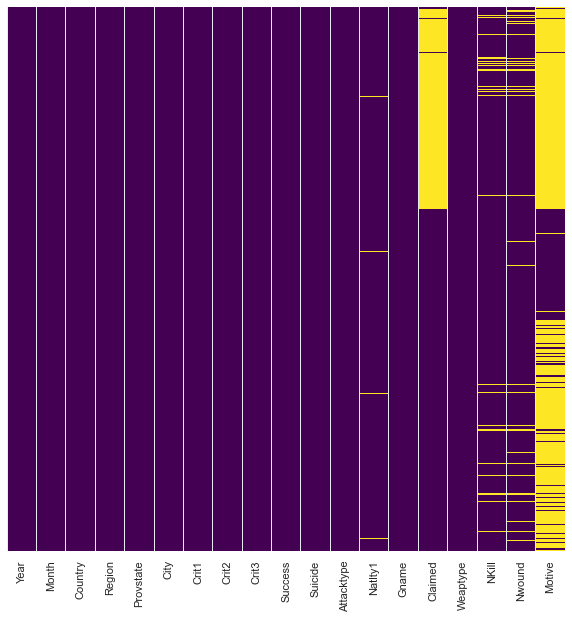

In [22]:
plt.figure(figsize=(6,5))
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False , cmap = "viridis")

In [23]:
data['Nwound'] = data['Nwound'].fillna(0)
data['NKill'] = data['NKill'].fillna(0)
data['Casualities'] = data['NKill'] + data['Nwound']

In [25]:
data['Provstate'].fillna("Unknown" , inplace = True)
data['City'].fillna("Unknown" , inplace = True)

In [26]:
data.head()

,Year,Month,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Natlty1,Gname,Claimed,Weaptype,NKill,Nwound,Motive,Casualities
0,1970,7,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,1,1,1,1,0,Assassination,Dominican Republic,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Belgium,23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,United States,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,United States,Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,United States,Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [27]:
data.dropna(axis=1 , inplace = True)

In [28]:
data.head()

,Year,Month,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Gname,Weaptype,NKill,Nwound,Casualities
0,1970,7,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,1,1,1,1,0,Assassination,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Unknown,Explosives,0.0,0.0,0.0
4,1970,1,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Unknown,Incendiary,0.0,0.0,0.0


In [29]:
data.describe()

,Year,Month,Crit1,Crit2,Crit3,Success,Suicide,NKill,Nwound,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,0.988530,0.993093,0.875668,0.889598,0.036507,2.266860,2.883296,5.150156
std,13.259430,3.388303,0.106483,0.082823,0.329961,0.313391,0.187549,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000,9574.000000


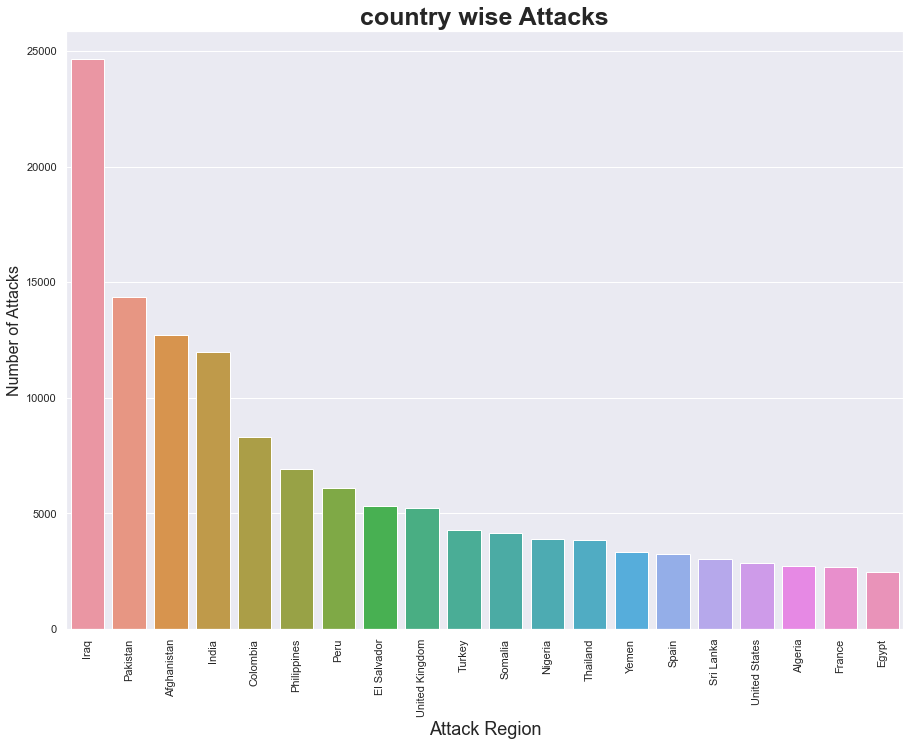

In [32]:
plt.rcParams["figure.figsize"] = 15 , 11
sns.barplot(x = data["Country"].value_counts()[:20].index , y = data["Country"].value_counts()[:20].values)
plt.ylabel("Number of Attacks" , fontsize = 16)
plt.xticks(rotation = 90)
plt.xlabel("Attack Region" , fontsize = 18)
plt.title("country wise Attacks" , size = 25 , fontweight = "bold");

Text(0.5, 1.0, 'Attack By Month')

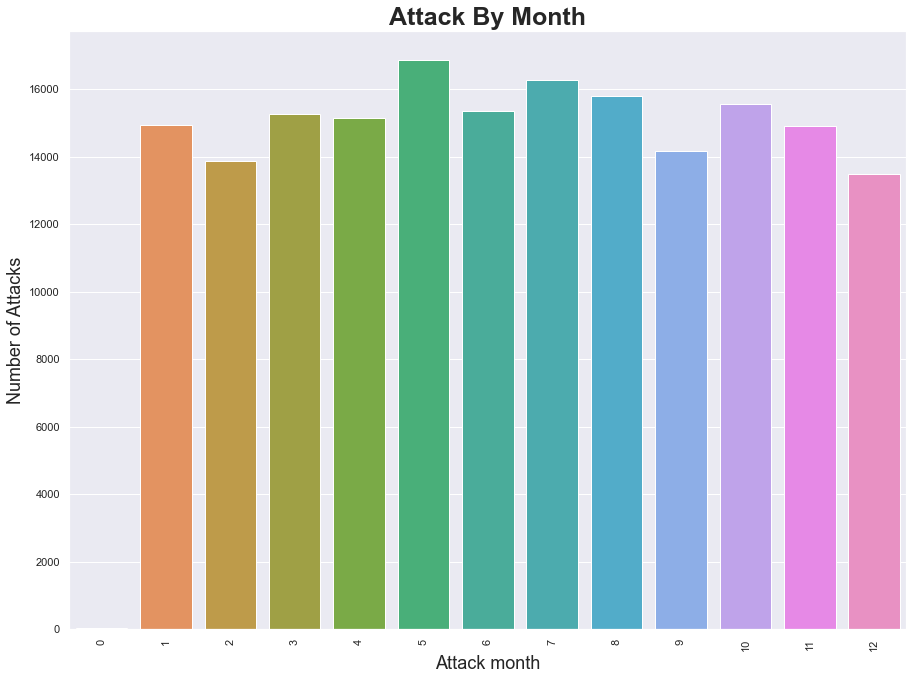

In [34]:
plt.rcParams["figure.figsize"] = 15 , 11
sns.barplot(x = data["Month"].value_counts()[:20].index , y = data["Month"].value_counts()[:20].values)
plt.ylabel("Number of Attacks" , fontsize = 18)
plt.xticks(rotation = 90)
plt.xlabel("Attack month" , fontsize = 18)
plt.title("Attack By Month" , size = 25 , fontweight = "bold")

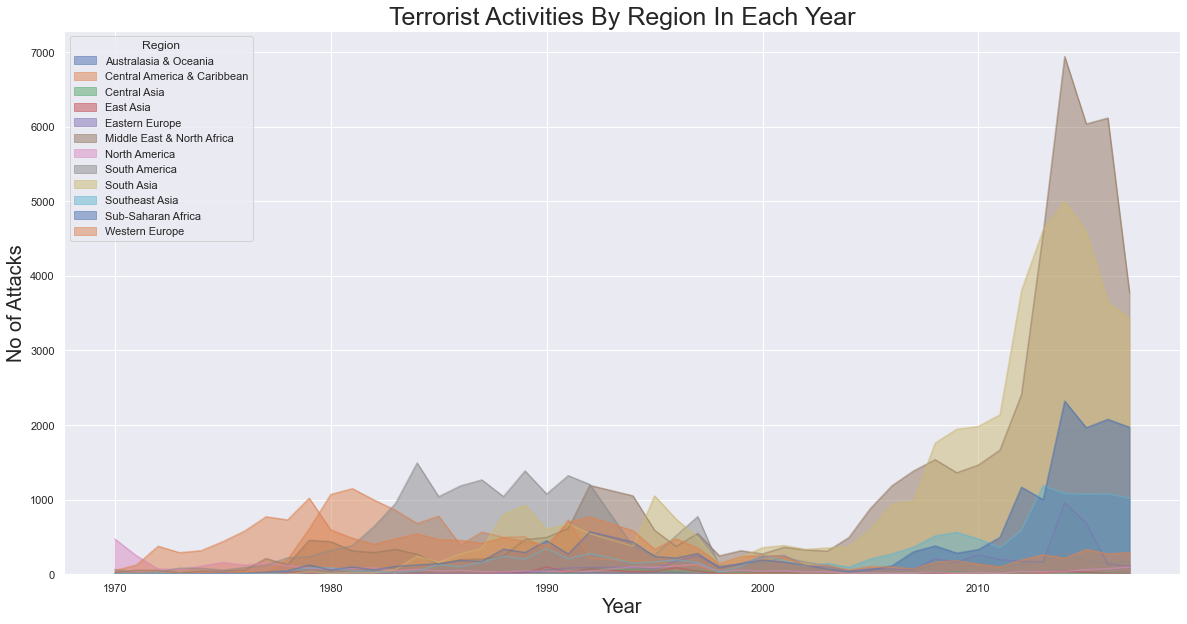

In [35]:
pd.crosstab(data.Year , data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year' , fontsize = 25)
plt.ylabel('No of Attacks' , fontsize=20)
plt.xlabel("Year", fontsize = 20)
plt.show()

In [36]:
pd.crosstab(data.Year , data.Region)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


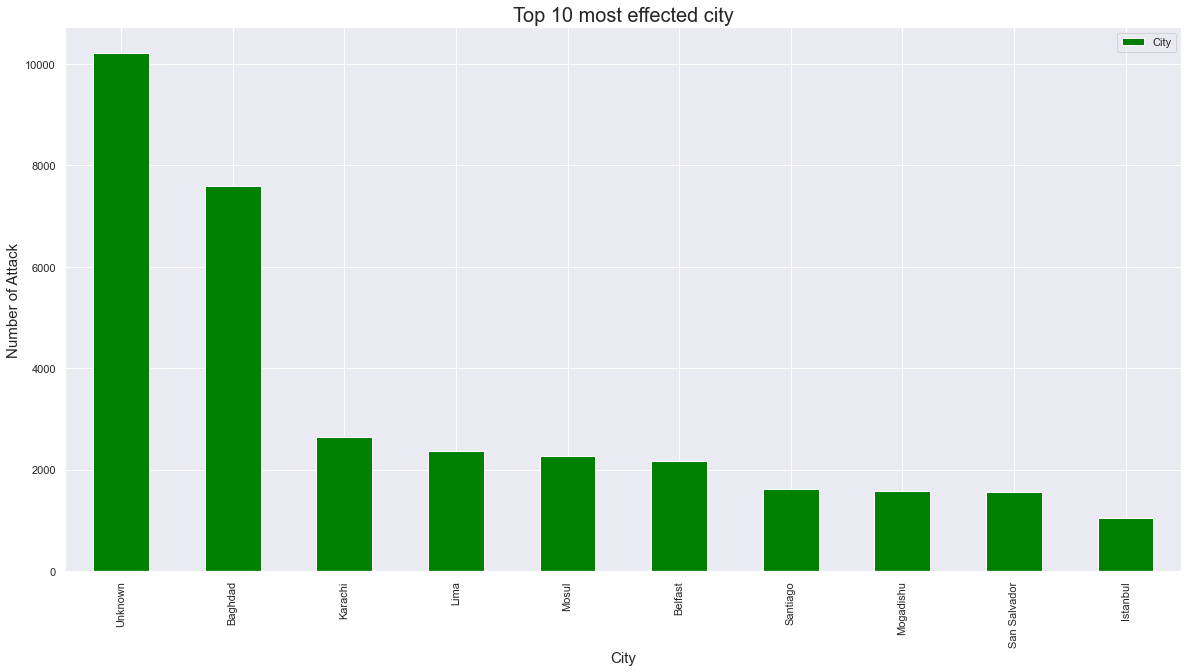

In [39]:
data['City'].value_counts().to_frame().sort_values('City' , axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='Green')
plt.xticks(rotation=90)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of Attack" , fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

In [45]:
countryNKill = data.pivot_table(columns = 'Country' , values = 'NKill' , aggfunc = 'sum')
countryNKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Falkland Islands,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
NKill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,258.0,1.0,44.0,1244.0,76.0,14.0,79.0,3.0,0.0,9.0,42.0,79.0,11.0,203.0,0.0,28.0,134.0,4205.0,543.0,2347.0,365.0,1990.0,1119.0,228.0,1008.0,14698.0,1.0,17.0,248.0,8.0,45.0,6.0,27.0,4069.0,5.0,274.0,3.0,34.0,2.0,9.0,54.0,3869.0,12053.0,2.0,46.0,3.0,1765.0,0.0,8.0,11.0,534.0,1.0,0.0,6.0,13.0,278.0,84.0,19.0,325.0,9.0,8.0,5167.0,213.0,17.0,41.0,336.0,307.0,4.0,6.0,0.0,19341.0,1238.0,1.0,1673.0,78589.0,117.0,1703.0,420.0,268.0,42.0,66.0,133.0,39.0,1948.0,83.0,63.0,10.0,27.0,2.0,4061.0,46.0,177.0,2598.0,1.0,0.0,1.0,49.0,31.0,33.0,152.0,20.0,1432.0,5.0,0.0,43.0,0.0,780.0,13.0,1.0,292.0,2711.0,1280.0,220.0,1969.0,37.0,35.0,0.0,1.0,10598.0,1474.0,22682.0,3.0,3.0,79.0,23822.0,38.0,79.0,59.0,15.0,12771.0,9559.0,9.0,32.0,7.0,182.0,217.0,4.0,4308.0,3236.0,672.0,325.0,3.0,3.0,0.0,840.0,5.0,7.0,1.0,4.0,10273.0,2674.0,10.0,2634.0,81.0,0.0,96.0,1288.0,15530.0,0.0,2.0,3883.0,29.0,6.0,22.0,74.0,15229.0,60.0,307.0,73.0,2742.0,76.0,6.0,351.0,6888.0,3.0,3065.0,2261.0,123.0,3410.0,3771.0,6.0,68.0,0.0,0.0,227.0,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0
